In [28]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Keras
from keras import models
from keras import layers

import warnings
warnings.filterwarnings('ignore')

In [29]:
#Dictionary for genres label encoding:
GENRES = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [30]:
PATH = './Features/dataset_features/data_features.csv'

In [31]:
def prepare_data(path, test_size=0.2):
    """
    Prepares data in given path to feed the model
    """
    data = pd.read_csv(path)
    X = data.drop('genre', axis=1)
    y = data.genre

    # Normalize data in X:
    scaled_features = StandardScaler().fit_transform(X.values)
    X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

In [32]:
X_train, X_test, y_train, y_test = prepare_data(PATH)

In [33]:
X_train.head()

,centroid_kurtosis,centroid_mean,centroid_skew,centroid_std,chroma_kurtosis,chroma_mean,chroma_skew,chroma_std,flux_kurtosis,flux_mean,...,rmse_std,roloff_kurtosis,roloff_mean,roloff_skew,roloff_std,tempo,zcr_kurtosis,zcr_mean,zcr_skew,zcr_std
5879,0.417087,1.131290,0.896740,0.653484,-0.071454,-0.949388,0.514809,1.398203,-0.710312,0.852178,...,-0.625782,-0.109964,0.732676,-0.163575,-0.431389,-0.885562,0.140342,1.717850,0.572242,1.171504
5458,-0.430164,0.396446,-0.314204,-1.154507,-0.340458,0.975517,-0.808548,-1.273408,-0.334303,-1.016499,...,-0.506292,-0.064258,0.256739,0.555976,-1.230545,-0.472355,-0.666136,0.904267,-0.839735,-0.602464
1758,-0.276003,-1.518328,0.281259,-1.084124,3.704449,-2.378763,2.629595,0.494530,-0.063726,-1.116668,...,-0.960753,-0.267928,-1.710023,0.262293,-1.016188,0.302407,-0.330078,-0.885054,0.072868,-1.183552
957,1.905831,-1.943976,2.372533,-1.715235,4.192446,-2.654797,2.857593,0.492545,1.610924,-2.190116,...,-1.449882,1.478786,-2.126546,2.031830,-1.868325,0.019557,-0.223334,-1.426988,-1.761702,-1.644390
6309,0.285016,1.439657,0.291514,1.482449,-0.941711,0.149562,-0.540119,1.268953,-0.033806,0.677824,...,0.591125,0.316831,1.980212,-2.049113,0.622727,0.019557,3.713169,0.172911,2.820090,1.200462


In [34]:
def define_model(x_train, show=False):
    """
    Defines Keras model to be trained
    """
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
    model.add(layers.Dense(10, activation='softmax'))

    if show:
        print(model.summary())
    return model

In [35]:
modelo=define_model(X_train,True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               19968     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total para

In [36]:
X_test.shape

(1782, 77)

In [37]:
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = modelo.fit(X_train,
                    y_train,
                    epochs=60,
                    batch_size=256,validation_split=0.1)

Train on 6415 samples, validate on 713 samples
Epoch 1/60
6415/6415 [==============================] - 2s 263us/step - loss: 2.0055 - acc: 0.2859 - val_loss: 1.4754 - val_acc: 0.4881
Epoch 2/60
6415/6415 [==============================] - 0s 43us/step - loss: 1.4662 - acc: 0.4744 - val_loss: 1.1067 - val_acc: 0.6381
Epoch 3/60
6415/6415 [==============================] - 0s 41us/step - loss: 1.2164 - acc: 0.5724 - val_loss: 0.9167 - val_acc: 0.7111
Epoch 4/60
6415/6415 [==============================] - 0s 57us/step - loss: 1.0831 - acc: 0.6259 - val_loss: 0.7911 - val_acc: 0.7419
Epoch 5/60
6415/6415 [==============================] - 0s 47us/step - loss: 0.9564 - acc: 0.6698 - val_loss: 0.7049 - val_acc: 0.7770
Epoch 6/60
6415/6415 [==============================] - 0s 46us/step - loss: 0.8756 - acc: 0.6973 - val_loss: 0.6552 - val_acc: 0.7938
Epoch 7/60
6415/6415 [==============================] - 0s 50us/step - loss: 0.8317 - acc: 0.7101 - val_loss: 0.6160 - val_acc: 0.8065
Epoch 8

In [39]:
test_loss, test_acc = modelo.evaluate(X_test,y_test)

1782/1782 [==============================] - 0s 72us/step


In [40]:
print(test_loss, test_acc)

0.2691917526133267 0.9180695845355623


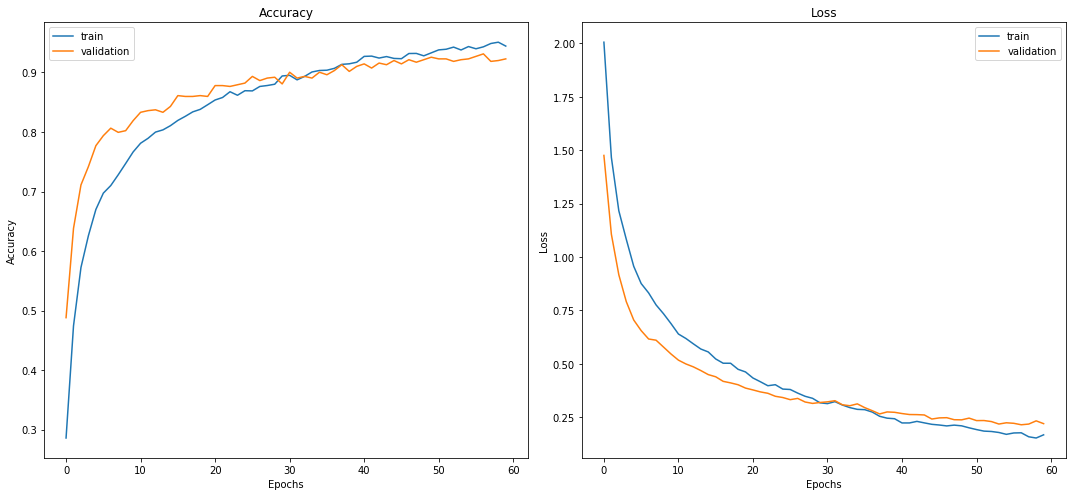

In [41]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


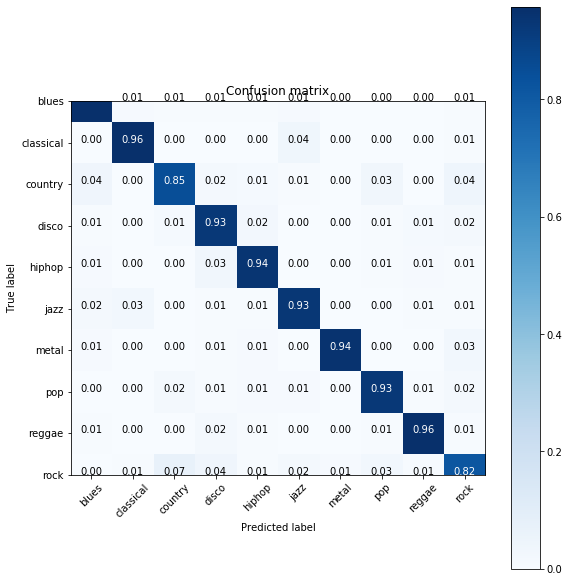

In [20]:
from sklearn.metrics import confusion_matrix
preds = modelo.predict_classes(X_test)
cm = confusion_matrix(preds,y_test)
keys = OrderedDict(sorted(GENRES.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)

In [114]:
#
test_loss, test_acc = modelo.evaluate(Xt1,yt1)
print(test_loss, test_acc)

10/10 [==============================] - 0s 1ms/step
0.4693319797515869 0.800000011920929


In [115]:
model1.predict_classes(Xt1)

array([2, 1, 2, 3, 4, 5, 6, 7, 9, 9])

In [116]:
test_loss, test_acc = model1.evaluate(Xt3,yt3)
print(test_loss, test_acc)

30/30 [==============================] - 0s 347us/step
0.7381046414375305 0.8666666746139526


In [118]:
test_loss, test_acc = model1.evaluate(X_test,y_test)
print(test_loss, test_acc)

1782/1782 [==============================] - 0s 95us/step
0.25669951081342834 0.9214365879025658


In [1]:
model1.save('./Models/FN_NNt.h5')

NameError: name 'model1' is not defined